True Weights: [50, 2, 3]
Learned Weights: [47.72272264  2.03386668  3.0354946 ]
R-squared Score: 0.9910359459939405


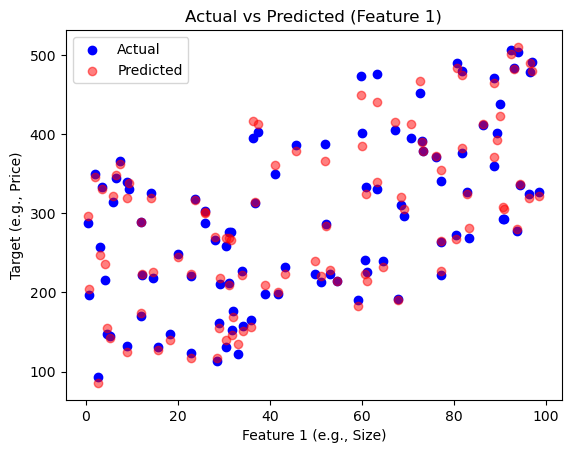

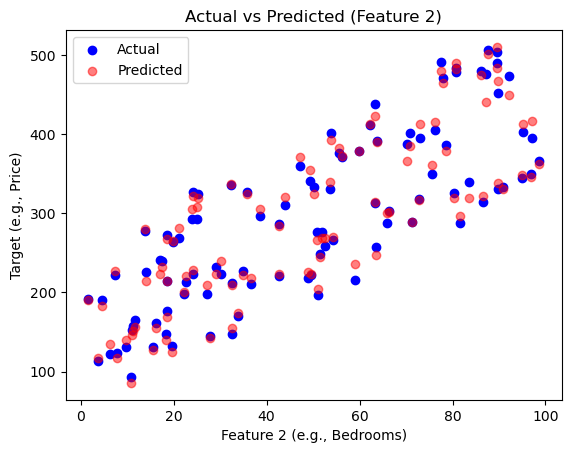

In [15]:
import numpy as np
import matplotlib.pyplot as plt

class MultipleLinearRegression:
    def __init__(self):
        self.weights = None  # Coefficients including intercept

    def fit(self, features, target):
        # Add a column of ones for the intercept (bias term)
        features_with_bias = np.c_[np.ones((features.shape[0], 1)), features]

        # Normal equation: weights = (X^T X)^(-1) X^T y
        features_transpose = features_with_bias.T
        self.weights = np.linalg.inv(features_transpose @ features_with_bias) @ features_transpose @ target

    def predict(self, features):
        # Add column of ones for bias
        features_with_bias = np.c_[np.ones((features.shape[0], 1)), features]
        return features_with_bias @ self.weights

    def r_squared(self, features, actual_values):
        predicted_values = self.predict(features)
        total_variation = np.sum((actual_values - np.mean(actual_values))**2)
        residual_variation = np.sum((actual_values - predicted_values)**2)
        return 1 - (residual_variation / total_variation)

# -----------------------------------------------
# Generate Sample Dataset

np.random.seed(42)
num_samples = 100
num_features = 2

# Generate random features: size, number of bedrooms (for example)
features = np.random.rand(num_samples, num_features) * 100

# True relationship: y = 50 + 2*x1 + 3*x2 + noise
true_weights = [50, 2, 3]
noise = np.random.randn(num_samples) * 10
target = 50 + features[:, 0] * 2 + features[:, 1] * 3 + noise

# -----------------------------------------------
# Train the model

regression_model = MultipleLinearRegression()
regression_model.fit(features, target)

# Predict values
predicted_target = regression_model.predict(features)

# Display results
print("True Weights:", true_weights)
print("Learned Weights:", regression_model.weights)

# R-squared value
r2_score = regression_model.r_squared(features, target)
print("R-squared Score:", r2_score)

# -----------------------------------------------
# Visualization: Feature 1 (X1) vs Target

plt.scatter(features[:, 0], target, color='blue', label='Actual')
plt.scatter(features[:, 0], predicted_target, color='red', alpha=0.5, label='Predicted')
plt.xlabel('Feature 1 (e.g., Size)')
plt.ylabel('Target (e.g., Price)')
plt.title('Actual vs Predicted (Feature 1)')
plt.legend()
plt.show()

# Visualization: Feature 2 (X2) vs Target

plt.scatter(features[:, 1], target, color='blue', label='Actual')
plt.scatter(features[:, 1], predicted_target, color='red', alpha=0.5, label='Predicted')
plt.xlabel('Feature 2 (e.g., Bedrooms)')
plt.ylabel('Target (e.g., Price)')
plt.title('Actual vs Predicted (Feature 2)')
plt.legend()
plt.show()
